In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import datetime as dt
from matplotlib import style
import mplfinance as mpf
import matplotlib.dates as mdates
import pandas_datareader.data as web
import yfinance as yf

In [82]:
style.use('ggplot')

In [102]:
start = '2020-06-06'
end = '2024-07-06'

df = yf.download('TSLA', start=start, end=end)
df.to_csv('tsla.csv')

[*********************100%%**********************]  1 of 1 completed


In [101]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

In [86]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
df.dropna(inplace=True)

In [87]:
print(df.head())

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2020-06-08  61.266666  63.333332  60.610668  63.327999  63.327999  212620500   
2020-06-09  62.667332  63.629333  61.595333  62.711334  62.711334  170823000   
2020-06-10  66.125336  68.498665  65.500000  68.336670  68.336670  278451000   
2020-06-11  66.013336  67.930664  64.800003  64.856003  64.856003  238747500   
2020-06-12  65.333336  65.865334  60.840000  62.352001  62.352001  251451000   

                100ma  
Date                   
2020-06-08  63.327999  
2020-06-09  63.019667  
2020-06-10  64.792001  
2020-06-11  64.808002  
2020-06-12  64.316801  


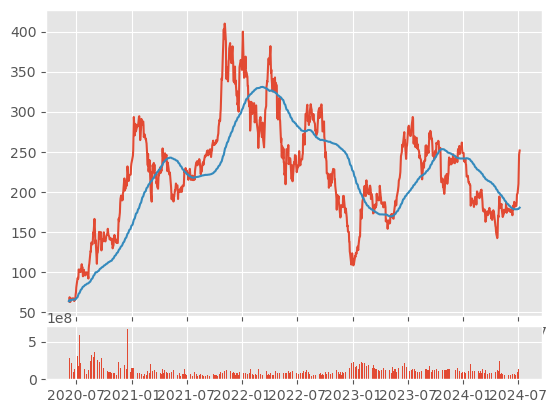

In [88]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=5, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
ax1.xaxis_date()

In [89]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

df_volume = df['Volume'].resample('10D').sum()

/Users/tomas/anaconda3/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


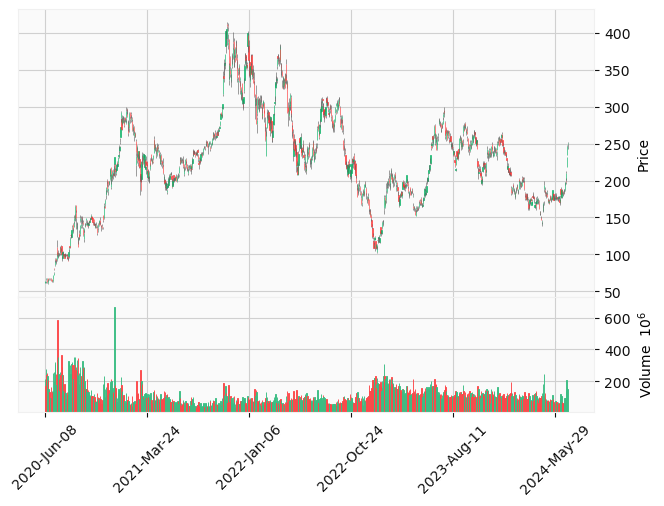

In [100]:
mpf.plot(df, type='candle', volume=True, style='yahoo')